📏 กำหนด MAX_LEN = 169
ข้อมูลพร้อมใช้งาน
Training samples: 5586
Validation samples: 698
Test samples: 699


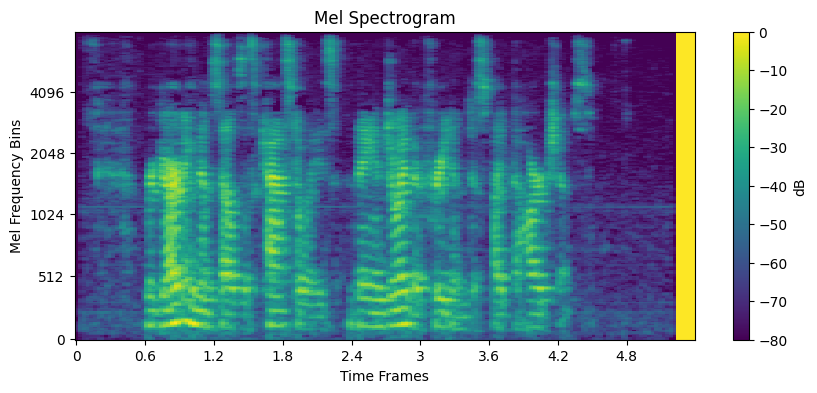

In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

tsv_path = "/Users/gam/Desktop/DEEP/FINAL/DATASET/en/validated.tsv"
df = pd.read_csv(tsv_path, sep="\t")
audio_folder = "/Users/gam/Desktop/DEEP/FINAL/DATASET/en/clips"
df["full_path"] = df["path"].apply(lambda x: os.path.join(audio_folder, x))

# กำหนดค่าคงที่
SAMPLE_RATE = 16000  # อัตราการสุ่มตัวอย่างเสียง
N_MELS = 256  # จำนวน Mel bins
MAX_LEN = None  # กำหนดความยาวสูงสุดของ time frames (จะคำนวณภายหลัง)

# ฟังก์ชันโหลดไฟล์เสียงและแปลงเป็น Mel Spectrogram
def load_audio(file_path, sr=SAMPLE_RATE, n_mels=N_MELS):
    y, sr = librosa.load(file_path, sr=sr)
    # คำนวณ Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=512)
    # แปลงเป็น dB scale เพื่อให้เห็นชัดขึ้น
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# โหลดทุกไฟล์เสียงเพื่อหาค่า MAX_LEN ที่เหมาะสม
mfcc_shapes = []
for _, row in df.iterrows():
    file_path = row["full_path"]
    try:
        mel_spec = load_audio(file_path)
        mfcc_shapes.append(mel_spec.shape[1])  # เก็บจำนวน time frames
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
# กำหนด MAX_LEN เป็นค่ามัธยฐาน (median) หรือค่าสูงสุดที่พบ
MAX_LEN = int(np.median(mfcc_shapes))  # ใช้ค่ากลางเพื่อป้องกัน outlier
print(f"📏 กำหนด MAX_LEN = {MAX_LEN}")
# โหลดไฟล์เสียงทั้งหมดและปรับขนาด
X = []
Y = []
for _, row in df.iterrows():
    file_path = row["full_path"]
    text = row["sentence"].lower()  # แปลงเป็นตัวพิมพ์เล็ก
    try:
        mel_spec = load_audio(file_path)
        # 📏 ปรับขนาดให้เท่ากับ MAX_LEN
        mel_spec_fixed = librosa.util.fix_length(mel_spec, size=MAX_LEN, axis=1)
        X.append(mel_spec_fixed)
        Y.append(text)
    except Exception as e:
        print(f" Error loading {file_path}: {e}")
# แปลงเป็น NumPy Array
X = np.array(X)
# ✂️ แบ่งข้อมูลเป็น Training, Validation, และ Test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)  # แบ่งออกเป็น 80% Training, 20% temp
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)  # แบ่ง temp เป็น 50% Validation, 50% Test

print("ข้อมูลพร้อมใช้งาน")
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

#แสดงตัวอย่าง Mel Spectrogram
def plot_spectrogram(sample_idx):
    mel_sample = X_train[sample_idx]

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_sample, sr=SAMPLE_RATE, x_axis="time", y_axis="mel", cmap="viridis")
    plt.colorbar(label="dB")
    plt.title("Mel Spectrogram")
    plt.xlabel("Time Frames")
    plt.ylabel("Mel Frequency Bins")
    plt.show()

#ทดลองแสดง Mel Spectrogram ของตัวอย่างแรก
plot_spectrogram(0)


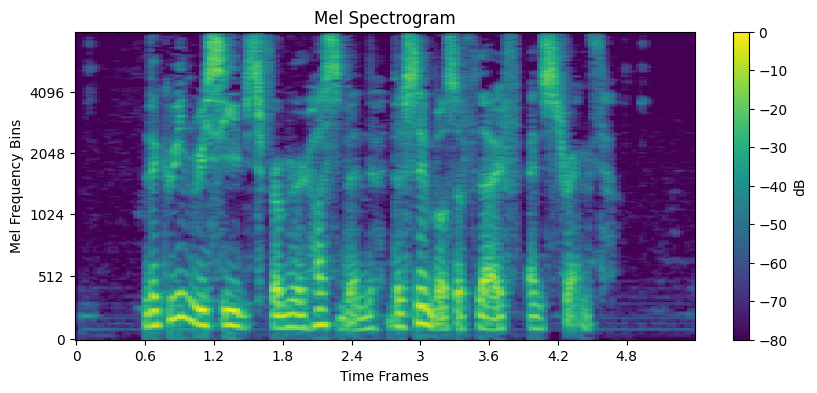

In [2]:
#แสดงตัวอย่าง Mel Spectrogram
def plot_spectrogram(sample_idx):
    mel_sample = X_train[sample_idx]

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_sample, sr=SAMPLE_RATE, x_axis="time", y_axis="mel", cmap="viridis")
    plt.colorbar(label="dB")
    plt.title("Mel Spectrogram")
    plt.xlabel("Time Frames")
    plt.ylabel("Mel Frequency Bins")
    plt.show()

#ทดลองแสดง Mel Spectrogram ของตัวอย่างแรก
plot_spectrogram(10)


In [3]:
# การจับคู่ระหว่างฟีเจอร์ (X) และป้าย (Y)
for i in range(5):  # แสดงข้อมูล 5 ตัวอย่างแรก
    print(f"ตัวอย่างที่ {i + 1}:")
    print(f"ข้อความ (Label): {Y[i]}")
    print(f"ขนาดของฟีเจอร์ (MFCC): {X[i].shape}")
    print("-" * 50)


ตัวอย่างที่ 1:
ข้อความ (Label): one day at noon a woman fell asleep among the reapers in the field.
ขนาดของฟีเจอร์ (MFCC): (256, 169)
--------------------------------------------------
ตัวอย่างที่ 2:
ข้อความ (Label): then they scrambled round the rocks to the other side of the house.
ขนาดของฟีเจอร์ (MFCC): (256, 169)
--------------------------------------------------
ตัวอย่างที่ 3:
ข้อความ (Label): dollar shops sell the rest.
ขนาดของฟีเจอร์ (MFCC): (256, 169)
--------------------------------------------------
ตัวอย่างที่ 4:
ข้อความ (Label): my very best concert bonnet.
ขนาดของฟีเจอร์ (MFCC): (256, 169)
--------------------------------------------------
ตัวอย่างที่ 5:
ข้อความ (Label): this time, however, as the padded envelopes were defused, there were no injuries.
ขนาดของฟีเจอร์ (MFCC): (256, 169)
--------------------------------------------------


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# สร้าง Tokenizer
tokenizer = Tokenizer(char_level=True)  # ใช้ char_level=True เพื่อแปลงเป็นตัวอักษร
tokenizer.fit_on_texts(Y_train)  # ฝึก tokenizer ด้วยข้อความใน Y_train

# กำหนด vocab_size (จำนวนตัวอักษรที่มีใน dataset + 1 สำหรับ padding)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size:", vocab_size)  # ✅ ตรวจสอบค่า

# แปลงข้อความเป็น sequence ของตัวเลข
Y_train_seq = tokenizer.texts_to_sequences(Y_train)
Y_val_seq = tokenizer.texts_to_sequences(Y_val)

# ทำ padding ให้มีความยาวเท่ากัน
MAX_LEN = 128
# กำหนดความยาวสูงสุด
Y_train_seq = pad_sequences(Y_train_seq, padding='post', maxlen=MAX_LEN)
Y_val_seq = pad_sequences(Y_val_seq, padding='post', maxlen=MAX_LEN)

# 🔹 ดูคำที่ถูกแปลงเป็นตัวเลข (ตัวอย่างบรรทัดที่ 4)
print("Original Text:", Y_train[1])  # แสดงข้อความต้นฉบับ
print("Tokenized Sequence:", Y_train_seq[1])  # แสดงลำดับตัวเลข


Vocab Size: 46
Original Text: after denaturation, the whey is removed without pressing or aging.
Tokenized Sequence: [ 4 16  3  2  9  1 12  2  8  4  3 15  9  4  3  5  7  8 25  1  3 10  2  1
 20 10  2 21  1  5  6  1  9  2 14  7 23  2 12  1 20  5  3 10  7 15  3  1
 17  9  2  6  6  5  8 19  1  7  9  1  4 19  5  8 19 18  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, BatchNormalization, Input, TimeDistributed
from tensorflow.keras.optimizers import Adam

# สร้างโมเดล
model = Sequential()

# เพิ่ม Input Layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
# เพิ่ม CNN Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# เพิ่ม GRU Layers
model.add(GRU(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# ใช้ TimeDistributed Layer
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(Dropout(0.5))
# Output Layer
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))
# คอมไพล์โมเดล
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# แสดงสรุปโมเดล
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 256, 64)        │        32,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 128, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128, 256)       │       247,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128, 128)       │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 128, 64)        │         8,256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 128, 46)        │         2,990 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441,070 (1.68 MB)

 Trainable params: 440,174 (1.68 MB)

 Non-trainable params: 896 (3.50 KB)

In [17]:
from tensorflow.keras.utils import to_categorical

# แปลง Y_train_seq และ Y_val_seq เป็น One-Hot Encoding
Y_train_onehot = to_categorical(Y_train_seq, num_classes=vocab_size)
Y_val_onehot = to_categorical(Y_val_seq, num_classes=vocab_size)
print("Shape of Y_train_onehot:", Y_train_onehot.shape)  # (batch_size, MAX_LEN, vocab_size)
print("Shape of Y_val_onehot:", Y_val_onehot.shape)      # (batch_size, MAX_LEN, vocab_size)
history = model.fit(X_train, Y_train_onehot, validation_data=(X_val, Y_val_onehot), epochs=15, batch_size=32)


Shape of Y_train_onehot: (5586, 128, 46)
Shape of Y_val_onehot: (698, 128, 46)
Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 53s 299ms/step - accuracy: 0.5671 - loss: 1.6060 - val_accuracy: 0.5485 - val_loss: 1.6899
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 49s 281ms/step - accuracy: 0.5663 - loss: 1.6064 - val_accuracy: 0.5667 - val_loss: 1.6017
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 50s 283ms/step - accuracy: 0.5724 - loss: 1.5891 - val_accuracy: 0.5670 - val_loss: 1.6062
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 49s 282ms/step - accuracy: 0.5711 - loss: 1.5907 - val_accuracy: 0.5666 - val_loss: 1.6030
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 50s 286ms/step - accuracy: 0.5708 - loss: 1.5903 - val_accuracy: 0.5672 - val_loss: 1.6067
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 50s 284ms/step - accuracy: 0.5712 - loss: 1.5835 - val_accuracy: 0.5612 - val_loss: 1.6293
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 51s 292ms/step - accuracy: 0.5743 - loss: 1.5749 - val_accuracy: 0.5646 - val_loss: 1.6338
Epoc

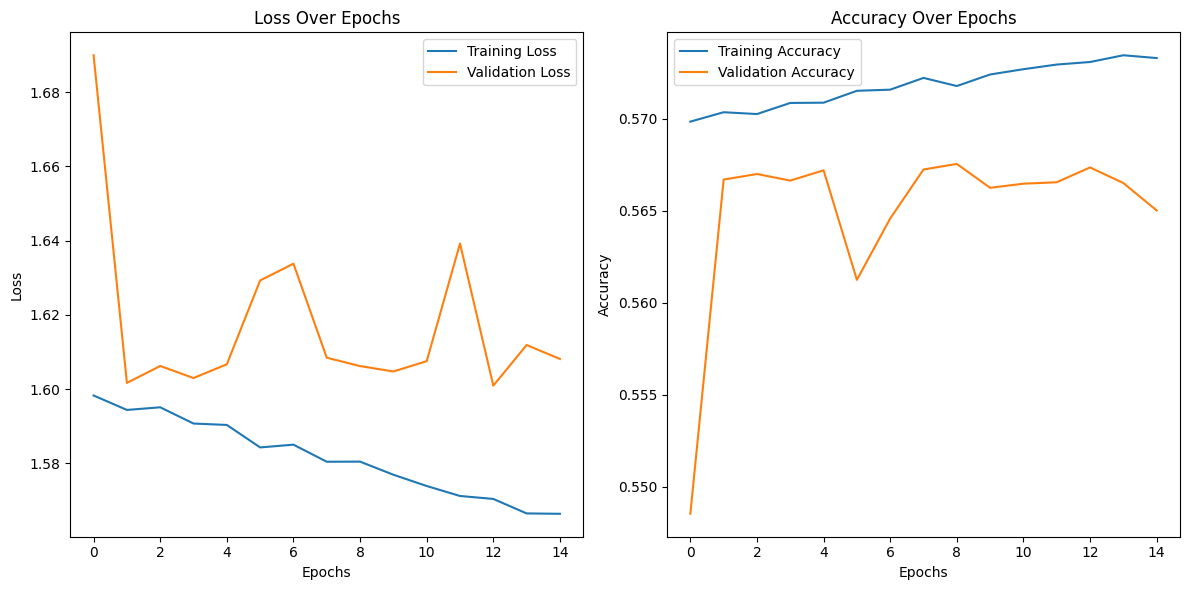

In [20]:
import matplotlib.pyplot as plt

# ดึงข้อมูลจาก history
history_dict = history.history

# กราฟ Loss
plt.figure(figsize=(12, 6))

# Loss สำหรับการฝึกและการทดสอบ
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# กราฟ Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# แสดงกราฟ
plt.tight_layout()
plt.show()


In [21]:
model.save("your_model.h5")  # บันทึกโมเดลลงในไฟล์ .h5


In [22]:
import librosa
import numpy as np

def preprocess_audio(file_path, sr=16000, n_mels=169, n_frames=256):
    # โหลดไฟล์เสียง
    audio, _ = librosa.load(file_path, sr=sr)

    # แปลงเป็น Mel Spectrogram โดยใช้ keyword arguments
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)

    # ทำ normalization
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Reshape ให้เป็นขนาดที่ตรงกับ (n_frames, n_mels)
    mel_spectrogram = mel_spectrogram[:, :n_frames]  # ตัดจำนวนเฟรมให้เป็น n_frames

    # ปรับขนาดให้อยู่ในรูป (n_frames, n_mels)
    mel_spectrogram = np.resize(mel_spectrogram, (n_frames, n_mels))

    # เพิ่มมิติให้เหมาะสมสำหรับการป้อนเข้าโมเดล
    mel_spectrogram = np.expand_dims(mel_spectrogram, axis=0)  # ขนาดจะเป็น (1, 256, 169)

    return mel_spectrogram


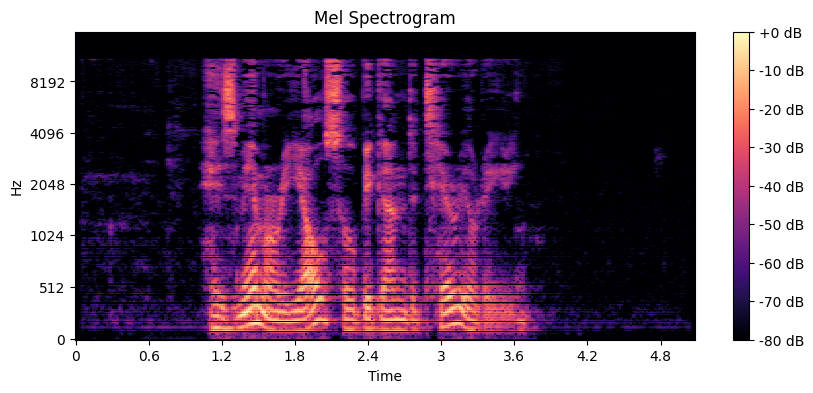

In [23]:
import librosa.display
import matplotlib.pyplot as plt

def plot_mel_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    
    # ใช้การเรียก melspectrogram ที่ถูกต้อง
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=512)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # แสดง Mel Spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

# ทดสอบแสดง Mel Spectrogram จากไฟล์เสียง
file_path = '/Users/gam/Desktop/DEEP/FINAL/dataset_root/audio/common_voice_en_37139433.mp3'
plot_mel_spectrogram(file_path)



In [28]:
import numpy as np

def predict_audio(file_path):
    # Preprocess the audio file (ให้ preprocess_audio ทำงาน)
    X_new = preprocess_audio(file_path)
    
    # ทำนายผลลัพธ์จากโมเดล
    Y_new_pred = model.predict(X_new)
    
    # เลือกตำแหน่งที่มีค่าความน่าจะเป็นสูงสุดในแต่ละตำแหน่ง
    Y_new_pred_classes = np.argmax(Y_new_pred, axis=-1)

    # ตัวอักษรที่ใช้ในการแมปจาก index ไปเป็นตัวอักษร
    characters = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '.', ',', '!', '?', '-', '_', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    # สร้าง dictionary ที่แมป index ไปเป็นตัวอักษร
    index_to_char = {i: c for i, c in enumerate(characters)}
    # แปลงผลการทำนายเป็นข้อความ
    predicted_text = ''.join([index_to_char[idx] for idx in Y_new_pred_classes[0] if idx != 0])  # ข้าม padding (0)

    return predicted_text

# ทดสอบการทำนายจากไฟล์เสียง
file_path = '/Users/gam/Desktop/DEEP/FINAL/DATASET/en/clips/common_voice_en_36537802.mp3'
predicted_text = predict_audio(file_path)
print(f"ข้อความที่ทำนายได้: {predicted_text}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
ข้อความที่ทำนายได้: cjaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


In [25]:
def character_level_accuracy(y_true, y_pred):
    """
    คำนวณค่า Accuracy ที่ระดับตัวอักษร (Character-Level Accuracy)
    """
    # แปลงเป็นลิสต์ของสตริง เผื่อว่าเป็น numpy array
    if isinstance(y_true, np.ndarray):
        y_true = y_true.tolist()
    if isinstance(y_pred, np.ndarray):
        y_pred = y_pred.tolist()

    # นับจำนวนตัวอักษรทั้งหมด
    total_chars = sum(len(str(y)) for y in y_true)
    correct_chars = sum(sum(1 for a, b in zip(str(y1), str(y2)) if a == b) for y1, y2 in zip(y_true, y_pred))

    if total_chars == 0:
        return 0  # ป้องกันการหารด้วยศูนย์
    
    return correct_chars / total_chars



In [26]:
import numpy as np

# ถ้า X_test และ Y_test เป็น numpy array ให้แปลงเป็นลิสต์ก่อน
Y_test = np.array(Y_test).tolist()
predicted_text = np.array(predicted_text).tolist()


In [27]:
accuracy = character_level_accuracy(X_test, Y_test)
print(f"🔍 ข้อความจริง: {Y_test}")
print(f"🔮 ทำนายได้: {predicted_text}")
print(f"🎯 ความแม่นยำ (Character-Level): {accuracy:.2f}%")

🔍 ข้อความจริง: ['in peasant society, people are socialized to save and to work independently.', 'he strongly opposed replacement theology.', 'the chain\'s interior layout has been described as "minimalist".', 'the title role was sung by daniel beretta, and maria magdalena was anne-marie david.', 'setzer favours vintage equipment and hollow body guitars, and currently endorses gretsch guitars.', 'in the local-only approach, all developers must use the same file system.', "this segment highlights reich's ideas that sexual frustration and violence are connected.", 'the russian embassy school in tokyo serves russian diplomat families in tokyo.', 'shortly afterwards, diebold forbade its top executives from making political donations.', 'kombe drove himself into the town with several buses of soldiers behind him.', "he co-wrote the hit sketch show 'the useless guide to scotland' with brian hennigan.", 'the act was frequently used to silence critics of racial segregation and apartheid.', 'his